In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("greenwing1985/housepricing")

print("Path to dataset files:", path)


100%|██████████| 4.57M/4.57M [00:00<00:00, 102MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/greenwing1985/housepricing/versions/1


In [2]:
# prompt: ler csv em dataframe os dados

import pandas as pd
df = pd.read_csv(path + '/HousePrices_HalfMil.csv')
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


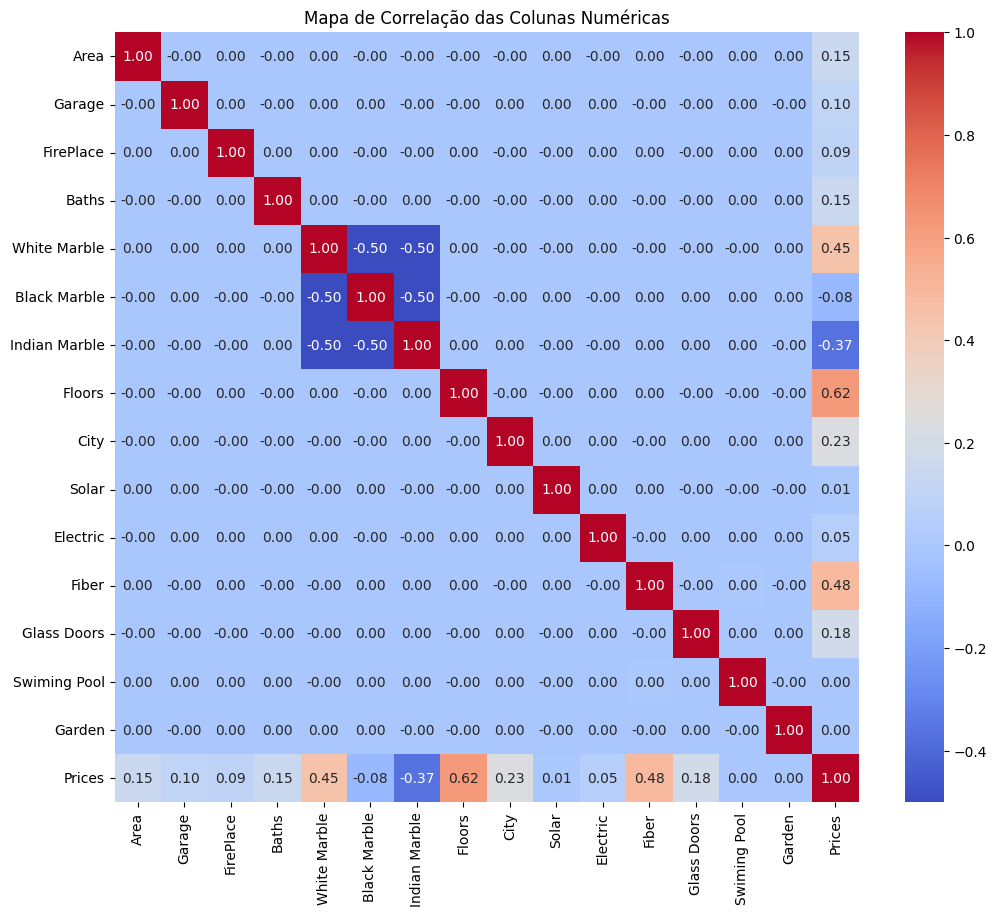

In [3]:
# prompt: Usando o DataFrame df: gerar mapa de correlação entre consumo de cerveja

# Não há colunas relacionadas ao consumo de cerveja no DataFrame fornecido.
# O código abaixo geraria um mapa de calor de correlação para as colunas numéricas
# presentes no DataFrame 'df', que são dados de preços de casas.

import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Gerar o mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação das Colunas Numéricas')
plt.show()

Mean Squared Error (MSE): 3.5664175998610014e-21
R-squared (R2): 1.0
Colunas disponíveis em X_test: Index(['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden'],
      dtype='object')


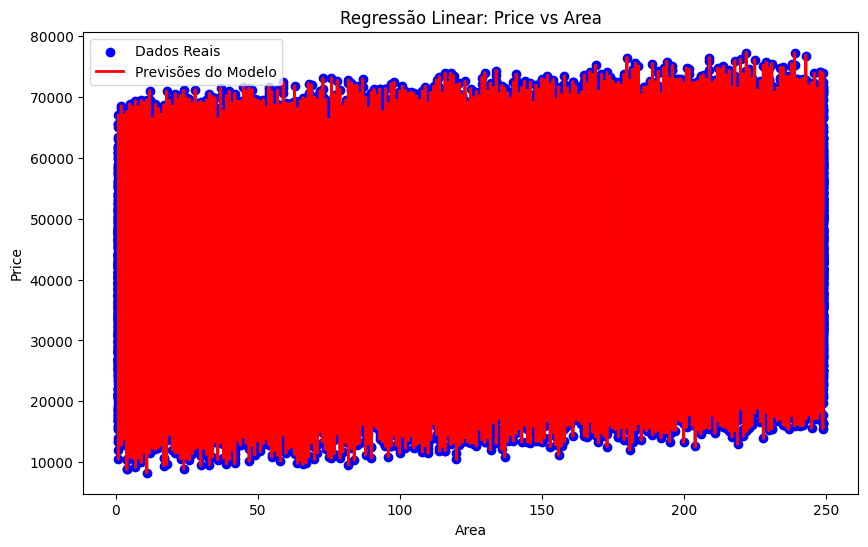

Intercept: 7333.333333333423
Coefficient (Area): 24.99999999999927


In [4]:
# prompt: gerar modelo de regressão linear para os Prices

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Corrected import path for LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#


X = df.drop('Prices', axis=1)

y = df['Prices']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Opcional: Visualizar os resultados (para uma única feature)
plt.figure(figsize=(10, 6))

# *** Adição para verificar o nome da coluna SquareFeet ***
# Verifique as colunas disponíveis em X_test para encontrar o nome correto da coluna de área.
# Substitua 'NomeCorretoDaColunaDeArea' pelo nome real da coluna que representa a área em SquareFeet.
# Você pode imprimir X_test.columns para ver todos os nomes de colunas.
print("Colunas disponíveis em X_test:", X_test.columns) # Impressão para debug

# Substitua 'NomeCorretoDaColunaDeArea' pelo nome exato da coluna que representa a área.
# Baseado nos dados do Kaggle dataset, o nome da coluna é 'Area'.
area_column_name = 'Area' # Substitua por 'SquareFeet' se esse for o nome correto no seu dataframe.

# Selecionar a coluna de área de X_test para o gráfico
# Usando o nome da coluna verificado/corrigido:
plt.scatter(X_test[area_column_name], y_test, color='blue', label='Dados Reais')

# Para a linha de previsão, também usar a coluna de área de X_test
# É importante que os valores do eixo x para a linha de previsão correspondam
# aos valores do eixo x usados para o scatter plot.
# Como a previsão é feita para todo X_test, precisamos alinhar as previsões
# com os valores da coluna de área correspondentes em X_test.
# No entanto, para uma linha de regressão simples, é comum plotar a linha
# sobre o intervalo dos dados do eixo x. Uma forma de fazer isso é classificar
# os valores da coluna de área em X_test e plotar as previsões correspondentes.
# Vamos simplificar e plotar a linha de previsão ordenada pelos valores da coluna de área.
X_test_sqft_sorted = X_test[area_column_name].sort_values()
# Prever usando X_test com índice ordenado para a coluna de área.
# Nota: model.predict espera um DataFrame ou array 2D.
# Precisamos selecionar a linha correta do DataFrame original X_test usando o índice ordenado.
# Em seguida, usar model.predict no DataFrame X_test indexado.
# Para plotar apenas com a feature de área, podemos recriar um pequeno DataFrame para previsão.
X_test_for_plot = X_test.loc[X_test_sqft_sorted.index]
y_pred_sorted = model.predict(X_test_for_plot)


plt.plot(X_test_sqft_sorted, y_pred_sorted, color='red', linewidth=2, label='Previsões do Modelo')
plt.xlabel(area_column_name) # Atualizar o label do eixo x
plt.ylabel('Price')
plt.title(f'Regressão Linear: Price vs {area_column_name}') # Atualizar o título
plt.legend()
plt.show()

# Opcional: Exibir os coeficientes do modelo
print(f'Intercept: {model.intercept_}')
# Encontrar o índice do coeficiente correspondente à coluna de área
try:
    # Usar o nome da coluna verificado/corrigido:
    sqft_index = X_test.columns.get_loc(area_column_name)
    print(f'Coefficient ({area_column_name}): {model.coef_[sqft_index]}') # Atualizar o label
except KeyError:
    # Atualizar a mensagem de erro para refletir o nome da coluna procurado
    print(f"Column '{area_column_name}' not found in features.")


In [5]:
print (model.coef_)


[ 2.50000000e+01  1.50000000e+03  7.50000000e+02  1.25000000e+03
  7.66666667e+03 -1.33333333e+03 -6.33333333e+03  1.50000000e+04
  3.50000000e+03  2.50000000e+02  1.25000000e+03  1.17500000e+04
  4.45000000e+03 -2.86419777e-11 -1.34150469e-11]


In [6]:
print(model.intercept_)


7333.333333333423
